In [ ]:
"""
Applying some ML algos to the MNIST dataset (supervised learning)
"""

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import sklearn as skl
import time 
import pickle
import os
import matplotlib.pyplot as plt 
%matplotlib inline 



from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier 
import xgboost as xg


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score


In [2]:
file ='/Users/rahulseth/Desktop/Repos/MachineLearning/MNIST/mnist_train.csv'
df = pd.read_csv(file)
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

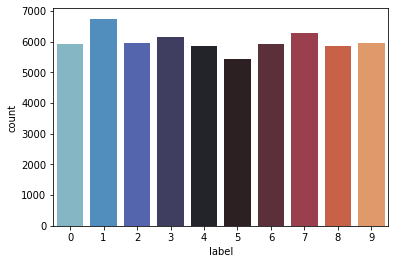

In [5]:
# Checking how the data looks 
sns.countplot(df['label'], palette='icefire')


In [6]:
"""
Split data in train and test set
Very generous training size assigned as of now
"""
X = df.iloc[:,1:].values/255
y = df.iloc[:,0]

X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

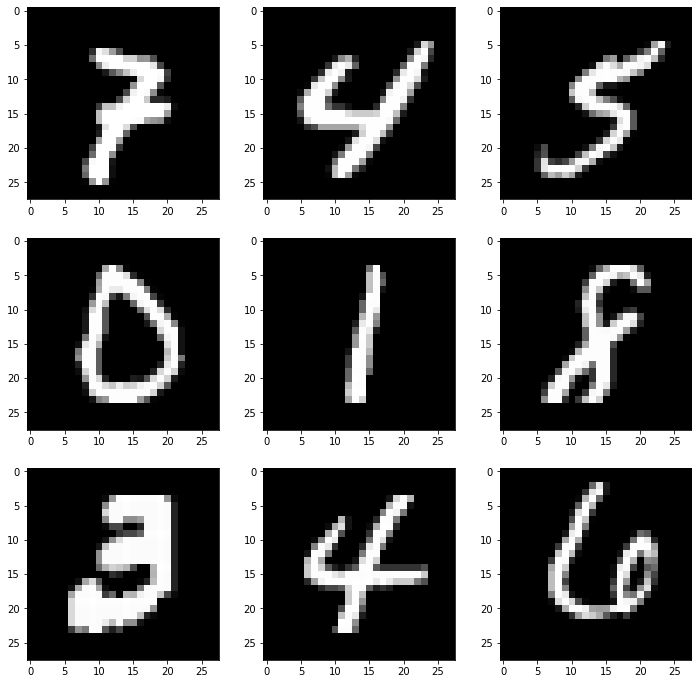

In [7]:
"""
Plotting some random digits from the dataset. 
The values of each pixel have been normalized between 0-255.
"""
fig, ax = plt.subplots(3,3, figsize=(12,12))

for i in range(9):
    nums = np.reshape(X_train[i], (28,28))
    plt.subplot(3,3,i+1)
    plt.imshow(nums, cmap='gray', interpolation='None')
    plt.gca().grid(False)


In [8]:
models = {
    'SVM-Linear': SVC(kernel='linear'),
    'SVM-Non Linear': SVC(kernel='rbf'),
    'Decision Tree:': DecisionTreeClassifier(max_depth=5),
    'Random Forrest': RandomForestClassifier(),
    'XG Boost': xg.XGBClassifier(),
    'Ada Boost': AdaBoostClassifier()
}
models

{'SVM-Linear': SVC(kernel='linear'),
 'SVM-Non Linear': SVC(),
 'Decision Tree:': DecisionTreeClassifier(max_depth=5),
 'Random Forrest': RandomForestClassifier(),
 'XG Boost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, gamma=None,
               gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, predictor=None, random_state=None,
               reg_alpha=None, reg_lambda=None, ...),
 'Ada Boost': AdaBoostClassifier()}

In [16]:
metrics = {}

for name, model in models.items():
  print("Training Data using: {}".format(name))
  start = time.time()
  model.fit(X_train, y_train)
  end = time.time()
  file = '{}.sav'.format(name)
  pickle.dump(model, open(file, 'wb')) # saving each model incase, I want to reuse it later

  m = {}
  m['training time'] = round(end-start)
  m[name]= m
  metrics = m

print("All done")

Training Data using: SVM-Linear
Training Data using: SVM-Non Linear
Training Data using: Decision Tree:
Training Data using: Random Forrest
Training Data using: XG Boost
Training Data using: Ada Boost
All done


In [20]:
for name, model in models.items():
  print("Starting predictions and calcs for {}".format(name))                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
  start = time.time()
  y_pred = model.predict(X_test)
  end = time.time()

  m = {}
  m['model'] = name
  m['f1'] = f1_score(y_test, y_pred, average='macro')
  m['accuracy'] = accuracy_score(y_test,y_pred)
  m['recall'] = recall_score(y_test,y_pred, average='macro')
  m['precsion'] = precision_score(y_test, y_pred, average='macro')
  m['pred time'] = round(end-start)
  metrics[name].update(m)

Starting predictions and calcs for SVM-Linear


In [ ]:
results = pd.DataFrame(metrics).transpose()
results[['accuracy', 'f1', 'precsion']] = round(100*results[['accuracy', 'f1', 'precsion']])
results

In [18]:
"""
Plotting results
1. Training time comparasion
2. Predicition time comparasion
3. Accuracy Comparasion
4. Recall Comparasion
"""

results['training time'].plot(kind='bar')

NameError: name 'results' is not defined